In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [64]:
dataset=pd.read_csv("x_final_csv.csv")
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [65]:
x=dataset.iloc[:,0:12].values
y=dataset.iloc[:,12].values

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [67]:
print(np.unique(y))
print(np.unique(y).sum())

['Crater wear' 'Flank Wear' 'Good' 'Nose Wear' 'Notch wear'
 'Tool breakage ']
Crater wearFlank WearGoodNose WearNotch wearTool breakage 


In [68]:
y.shape

(300,)

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y2=pd.get_dummies(y1).values
print(y1.shape)
print(y2.shape)

(300,)
(300, 6)


In [70]:
sample_size=x.shape[0]
time_steps=x.shape[1]
input_dimension=1
x_reshaped=x.reshape(sample_size,time_steps,input_dimension)

print("After reshape:\n",x_reshaped.shape)
print("Sample shape:\n",x_reshaped[0].shape)
print("An example sample :\n",x_reshaped[0])

After reshape:
 (300, 12, 1)
Sample shape:
 (12, 1)
An example sample :
 [[-0.86939937]
 [ 1.40880986]
 [ 1.38417949]
 [-0.866907  ]
 [-0.45678934]
 [-0.39817647]
 [ 0.03912756]
 [-0.88567023]
 [ 1.25685037]
 [ 1.27250082]
 [ 1.29450258]
 [ 0.05783149]]


In [71]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=False,random_state=None)

In [72]:
i=1
for train_index,test_index in kf.split(x_reshaped,y1):
    print("fold",i)
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y1[train_index],y1[test_index]
    print(x_train,"having:",len(x_train))
    print(x_test,"having:",len(x_test))
    print("--------------------------")
    i+=1

fold 1
[[ -0.41412406   0.56211278   0.53269112 ...   0.04123755   0.50915787
    0.05783149]
 [  1.52368499  -0.84904901   0.39645298 ...   0.27576389  -0.59737909
    0.05783149]
 [  0.71675509  -0.7608514   -1.10216654 ...   0.56892181  -0.59925193
    0.05783149]
 ...
 [  0.12883512  -0.30222382  -0.31879724 ...  -0.31055196  -0.21500736
    0.05783149]
 [  0.96665167   0.68558944   0.70298879 ...   0.62755339   0.29284472
    0.05783149]
 [ -0.0473281    0.79142657   0.77110786 ...   0.68618498  -8.36186624
  -17.29161647]] having: 200
[[-0.86939937  1.40880986  1.38417949 ...  1.27250082  1.29450258
   0.05783149]
 [-0.88603225  1.51464699  1.45229855 ...  1.44839558  1.39220246
   0.05783149]
 [-0.91483258  1.62048413  1.55447716 ...  1.56565875  1.47429533
   0.05783149]
 ...
 [-0.92612546  0.8090661   0.77110786 ...  0.2171323   0.75730932
   0.05783149]
 [-0.93989554  0.8090661   0.77110786 ...  0.2171323   0.75855788
   0.05783149]
 [-0.93615972  0.8090661   0.77110786 ...  

In [73]:
print(np.unique(y1))
print(np.unique(y1).sum())

[0 1 2 3 4 5]
15


In [74]:
print(np.unique(y2))
print(np.unique(y2).sum())

[0 1]
1


In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Add,Dense,Activation,ZeroPadding1D,Flatten,Conv1D,AveragePooling1D,MaxPooling1D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform

In [76]:
def identity_block(X,f,filters):
    F1,F2,F3 = filters
    X_shortcut = X
    
    #first layer
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=1, padding='same')(X)
    X = Activation('relu')(X)
    
    #second layer
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=1, padding='same')(X)
    X = Activation('relu')(X)
    
    #third layer
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=1, padding='same')(X)
    
    #final step: add shortcut value(X_shortcut)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [77]:
def convolutional_block(X,f,filters,s=2):
    F1,F2,F3 = filters
    X_shortcut = X
    
    #first layer
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(s, s), padding='same')(X)
    X = BatchNormalization(axis=3)(X) #normalisation on channels
    X = Activation('relu')(X)
    
    #second layer
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #third layer
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='same')(X)
    
    #adding convolutional layer in shortcut path#
    X_shortcut = Conv2D(filters=F3, kernel_size=1, strides=(s, s), padding='same')( X_shortcut)
    X = BatchNormalization(axis=3)(X)
    #final step: add shortcut value(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [78]:
def ResNet(input_shape=(150, 150, 3), classes=6):
    
    #define the input_shape
    X_input=Input(input_shape)
    
    #zero-padding
    X=ZeroPadding2D(3, 3)(X_input)
    
    #Step 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling1D((3, 3), strides=(2, 2))(X)
    
    #Step 2
    X = convolutional_block(X, f=3, filters=[64,64,256], s=1)
    X = identity_block(X,3,[64,64,256])
    X = identity_block(X,3,[64,64,256])
    
    #step 3
    X = convolutional_block(X, f=3, filters=[128,128,512], s=2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    
    #step 4
    X = convolutional_block(X, f=3, filters=[256,256,1024], s=2)
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    
    #step 5
    X = convolutional_block(X, f=3, filters=[512,512,2048], s=2)
    X = identity_block(X, 3, [512,512,2048])
    X = identity_block(X, 3, [512,512,2048])
    
    #AVGPOOL
    X = AveragePooling2D((1, 1), name="avg_pool")(X)
    
    #Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc'+str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    
    model=Model(inputs=X_input, outputs=X, name='ResNet')
    return model
    
 

In [79]:
model=ResNet(input_shape=(150, 150,1),classes=6)
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

In [80]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [81]:
model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 12, 1)]      0                                            
__________________________________________________________________________________________________
zero_padding1d_1 (ZeroPadding1D (None, 18, 1)        0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_50 (Conv1D)              (None, 6, 64)        512         zero_padding1d_1[0][0]           
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 2, 64)        0           conv1d_50[0][0]                  
_____________________________________________________________________________________________

In [82]:
model_history=model.fit(x_train, y_train,validation_split=.33,batch_size=10, epochs=100)

Epoch 1/100
14/14 [==============================] - 16s 592ms/step - loss: 1.6126 - accuracy: 0.2996 - val_loss: 7.0693 - val_accuracy: 0.2424
Epoch 2/100
14/14 [==============================] - 7s 488ms/step - loss: 1.1425 - accuracy: 0.5894 - val_loss: 4.0050 - val_accuracy: 0.2424
Epoch 3/100
14/14 [==============================] - 7s 499ms/step - loss: 0.5973 - accuracy: 0.5963 - val_loss: 14.7185 - val_accuracy: 0.2424
Epoch 4/100
14/14 [==============================] - 7s 512ms/step - loss: 0.6075 - accuracy: 0.6583 - val_loss: 15.5093 - val_accuracy: 0.2424
Epoch 5/100
14/14 [==============================] - 8s 567ms/step - loss: 0.4977 - accuracy: 0.6792 - val_loss: 15.8714 - val_accuracy: 0.2424
Epoch 6/100
14/14 [==============================] - 7s 519ms/step - loss: 0.4939 - accuracy: 0.7191 - val_loss: 17.9703 - val_accuracy: 0.2424
Epoch 7/100
14/14 [==============================] - 7s 530ms/step - loss: 0.5458 - accuracy: 0.5502 - val_loss: 32.5154 - val_accuracy: 

14/14 [==============================] - 7s 488ms/step - loss: 0.4778 - accuracy: 0.6224 - val_loss: 58.4216 - val_accuracy: 0.2424
Epoch 58/100
14/14 [==============================] - 7s 500ms/step - loss: 0.4502 - accuracy: 0.7128 - val_loss: 66.0739 - val_accuracy: 0.2424
Epoch 59/100
14/14 [==============================] - 7s 481ms/step - loss: 0.4264 - accuracy: 0.7353 - val_loss: 78.9201 - val_accuracy: 0.2424
Epoch 60/100
14/14 [==============================] - 7s 511ms/step - loss: 0.6698 - accuracy: 0.6853 - val_loss: 244.7491 - val_accuracy: 0.2424
Epoch 61/100
14/14 [==============================] - 7s 525ms/step - loss: 0.7613 - accuracy: 0.5696 - val_loss: 7.9130 - val_accuracy: 0.0000e+00
Epoch 62/100
14/14 [==============================] - 7s 488ms/step - loss: 0.6147 - accuracy: 0.5580 - val_loss: 41.9320 - val_accuracy: 0.2424
Epoch 63/100
14/14 [==============================] - 7s 512ms/step - loss: 0.4666 - accuracy: 0.6288 - val_loss: 59.3665 - val_accuracy: 0

In [60]:
np.pred=model.predict(x_test)
y_pred=np.pred.argmax(axis=-1)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00      50.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



C:\Users\abulf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abulf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

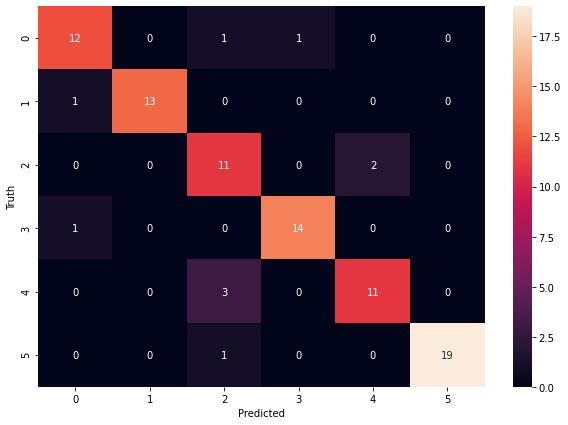

In [39]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
acc=(12+13+11+14+11+19)/(14+14+13+15+14+20)
acc

0.8888888888888888